In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
appl_returns_root = "/content/drive/MyDrive/conference_data/AAPL_returns.csv"
amd_returns_root = "/content/drive/MyDrive/conference_data/AMD_returns.csv"
amzn_returns_root = "/content/drive/MyDrive/conference_data/AMZN_returns.csv"
asml_returns_root = "/content/drive/MyDrive/conference_data/ASML_returns.csv"
csco_returns_root = "/content/drive/MyDrive/conference_data/CSCO_returns.csv"
goog_returns_root = "/content/drive/MyDrive/conference_data/GOOGL_returns.csv"
intc_returns_root = "/content/drive/MyDrive/conference_data/INTC_returns.csv"
msft_returns_root = "/content/drive/MyDrive/conference_data/MSFT_returns.csv"
mu_returns_root = "/content/drive/MyDrive/conference_data/MU_returns.csv"
nvda_returns_root = "/content/drive/MyDrive/conference_data/NVDA_returns.csv"

In [3]:
appl_features_root = "/content/drive/MyDrive/conference_data/AAPL_features.csv"
amd_features_root = "/content/drive/MyDrive/conference_data/AMD_features.csv"
amzn_features_root = "/content/drive/MyDrive/conference_data/AMZN_features.csv"
asml_features_root = "/content/drive/MyDrive/conference_data/ASML_features.csv"
csco_features_root = "/content/drive/MyDrive/conference_data/CSCO_features.csv"
goog_features_root = "/content/drive/MyDrive/conference_data/GOOGL_features.csv"
intc_features_root = "/content/drive/MyDrive/conference_data/INTC_features.csv"
msft_features_root = "/content/drive/MyDrive/conference_data/MSFT_features.csv"
mu_features_root = "/content/drive/MyDrive/conference_data/MU_features.csv"
nvda_features_root = "/content/drive/MyDrive/conference_data/NVDA_features.csv"

In [4]:
appl_earnings_df = pd.read_csv(appl_returns_root)
amd_earnings_df = pd.read_csv(amd_returns_root)
amzn_earnings_df = pd.read_csv(amzn_returns_root)
asml_earnings_df = pd.read_csv(asml_returns_root)
csco_earnings_df = pd.read_csv(csco_returns_root)
goog_earnings_df = pd.read_csv(goog_returns_root)
intc_earnings_df = pd.read_csv(intc_returns_root)
msft_earnings_df = pd.read_csv(msft_returns_root)
mu_earnings_df = pd.read_csv(mu_returns_root)
nvda_earnings_df = pd.read_csv(nvda_returns_root)

In [5]:
appl_features_df = pd.read_csv(appl_features_root)
amd_features_df = pd.read_csv(amd_features_root)
amzn_features_df = pd.read_csv(amzn_features_root)
asml_features_df = pd.read_csv(asml_features_root)
csco_features_df = pd.read_csv(csco_features_root)
goog_features_df = pd.read_csv(goog_features_root)
intc_features_df = pd.read_csv(intc_features_root)
msft_features_df = pd.read_csv(msft_features_root)
mu_features_df = pd.read_csv(mu_features_root)
nvda_features_df = pd.read_csv(nvda_features_root)

In [6]:
features_df = pd.concat([
    appl_features_df,
    amd_features_df,
    amzn_features_df,
    asml_features_df,
    csco_features_df,
    goog_features_df,
    intc_features_df,
    msft_features_df,
    mu_features_df,
    nvda_features_df
], ignore_index=True)

In [7]:
returns_df = pd.concat([
    appl_earnings_df,
    amd_earnings_df,
    amzn_earnings_df,
    asml_earnings_df,
    csco_earnings_df,
    goog_earnings_df,
    intc_earnings_df,
    msft_earnings_df,
    mu_earnings_df,
    nvda_earnings_df
], ignore_index=True)


In [8]:
returns_df['earnings_date'] = pd.to_datetime(returns_df['earnings_date'])

In [9]:
full_data = features_df.merge(
    returns_df,
    on=["ticker", "quarter"],
    how="inner"
)

In [10]:
import statsmodels.api as sm
def residualize(group):
    X = sm.add_constant(group[["qa_management_length_zscore"]])
    y = group["uncertainty_count_qa_management"]
    model = sm.OLS(y, X).fit()
    return model.resid

full_data["excess_uncertainty_qa"] = (
    full_data.groupby("ticker", group_keys=False)
    .apply(residualize)
)

/tmp/ipython-input-1059007683.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(residualize)


/tmp/ipython-input-1942266941.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bucket_returns = full_data.groupby("unc_bucket")[


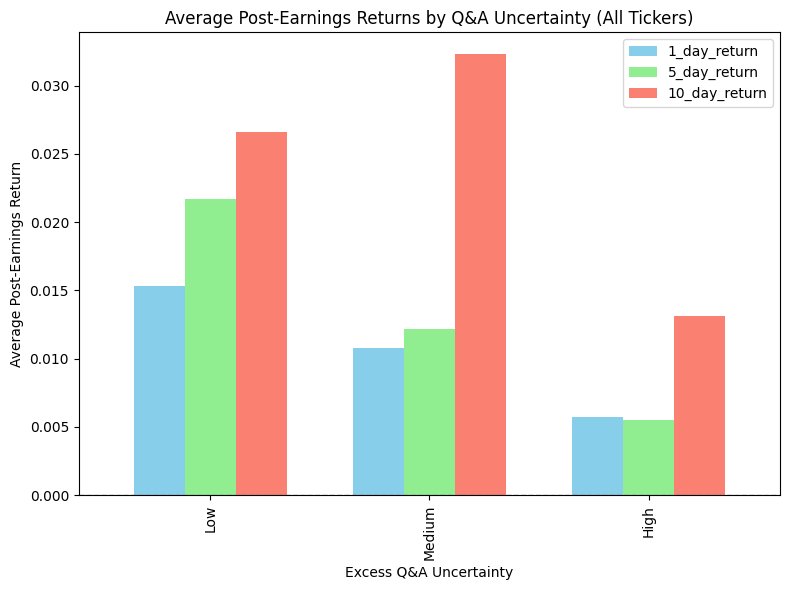

In [11]:
# Bucket into 3 quantiles across all tickers
full_data["unc_bucket"] = pd.qcut(
    full_data["excess_uncertainty_qa"],  # or 'uncertainty_count_qa_management'
    q=3,
    labels=["Low", "Medium", "High"]
)

# Compute mean returns per bucket (pooled across all tickers)
bucket_returns = full_data.groupby("unc_bucket")[
    ["1_day_return", "5_day_return", "10_day_return"]
].mean()

# Plot
fig, ax = plt.subplots(figsize=(8,6))

colors = ["skyblue", "lightgreen", "salmon"]

bucket_returns.plot(
    kind="bar",
    ax=ax,
    color=colors,
    width=0.7,
    legend=True
)

# Horizontal zero line
ax.axhline(0, linestyle="--", color="gray", linewidth=1)

# Labels and title
ax.set_ylabel("Average Post-Earnings Return")
ax.set_xlabel("Excess Q&A Uncertainty")
ax.set_title("Average Post-Earnings Returns by Q&A Uncertainty (All Tickers)")

plt.tight_layout()
plt.show()

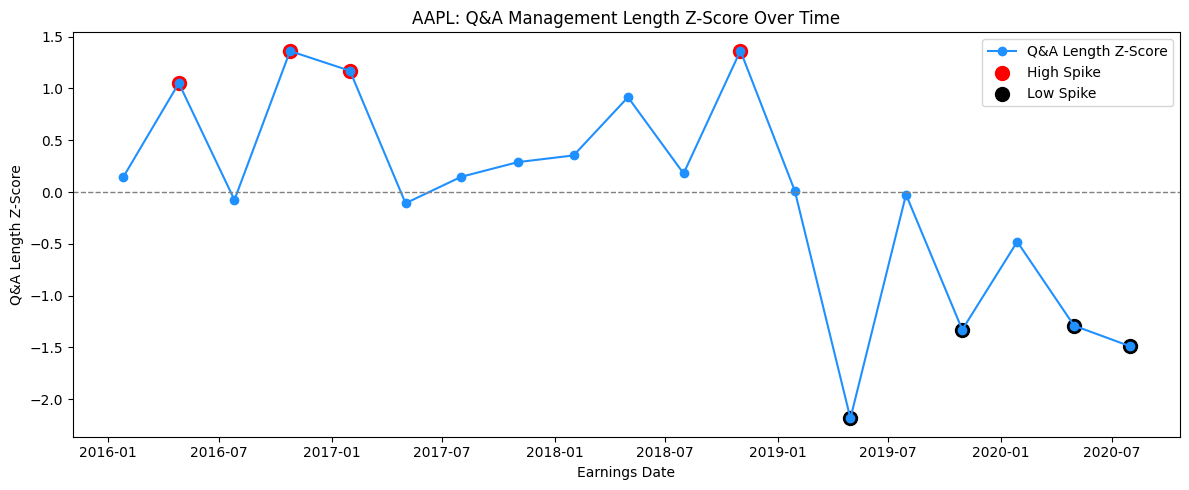

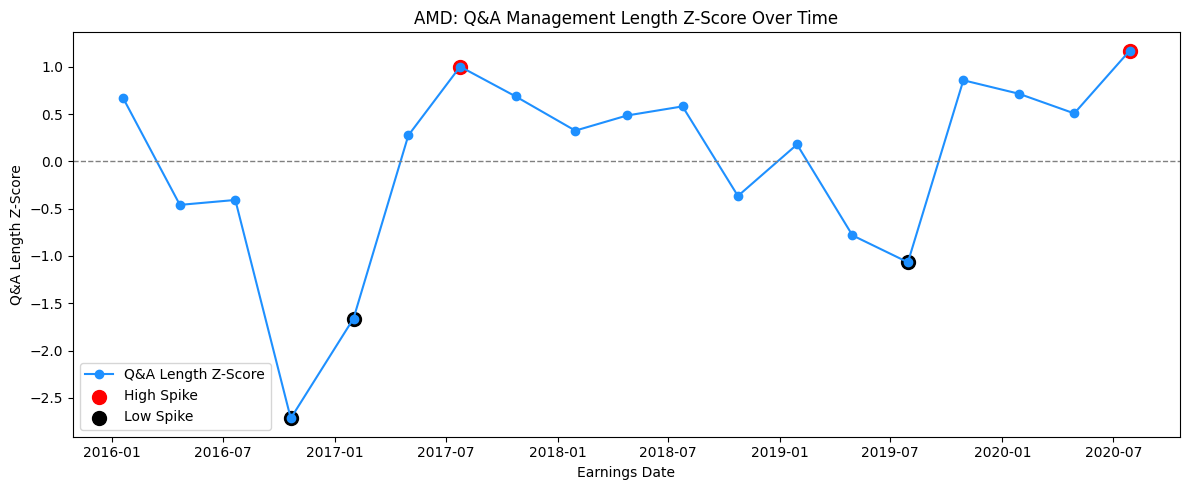

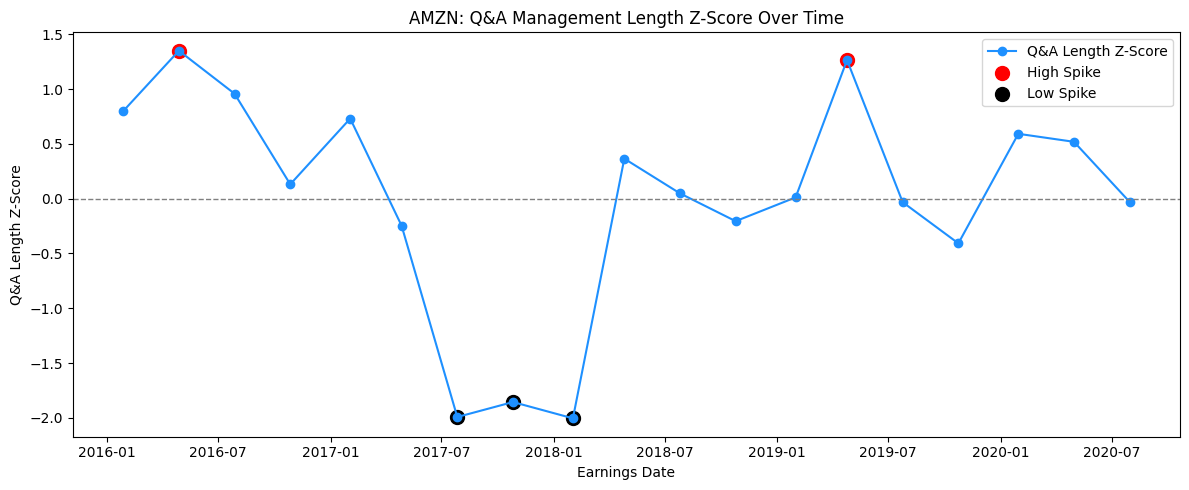

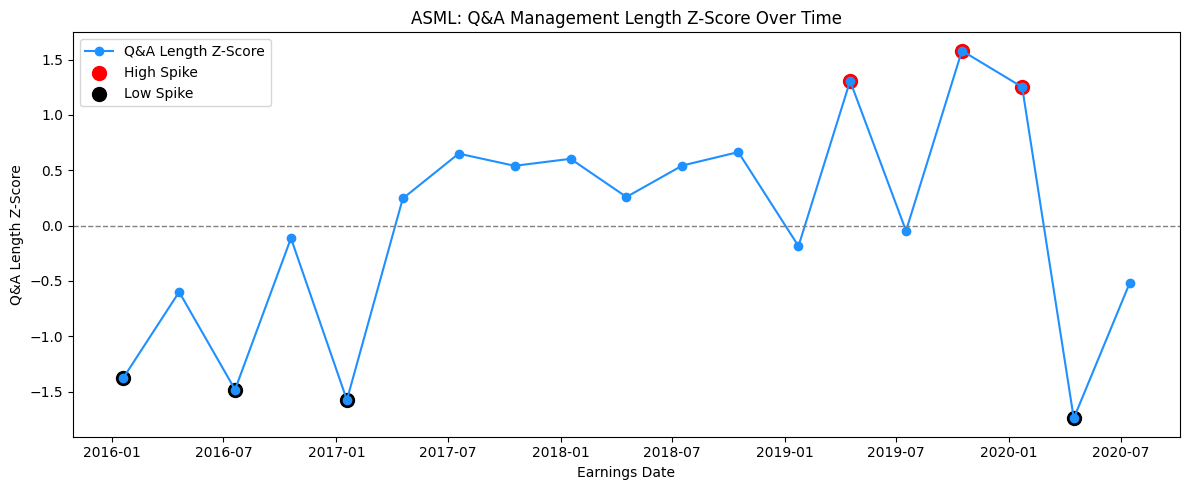

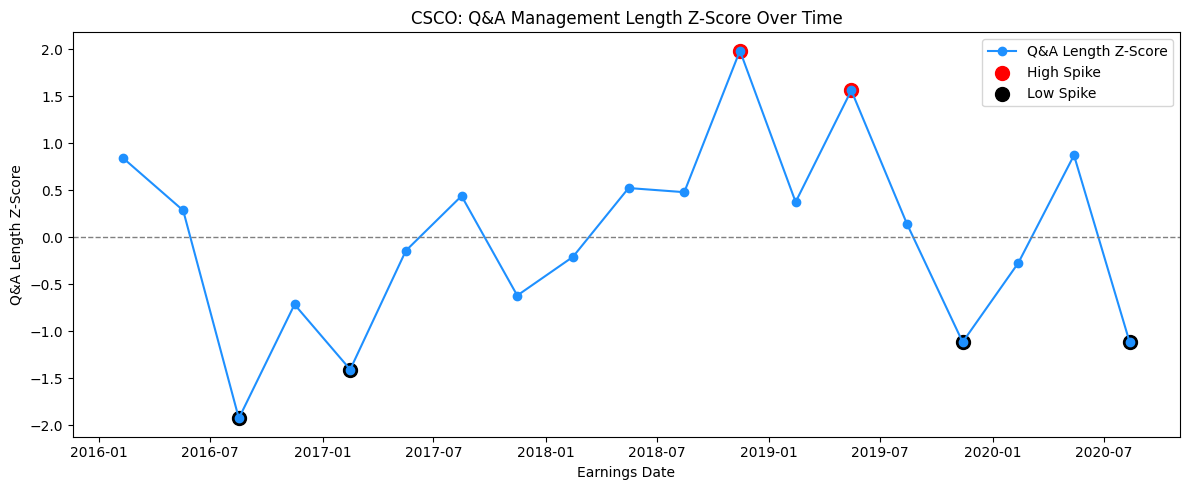

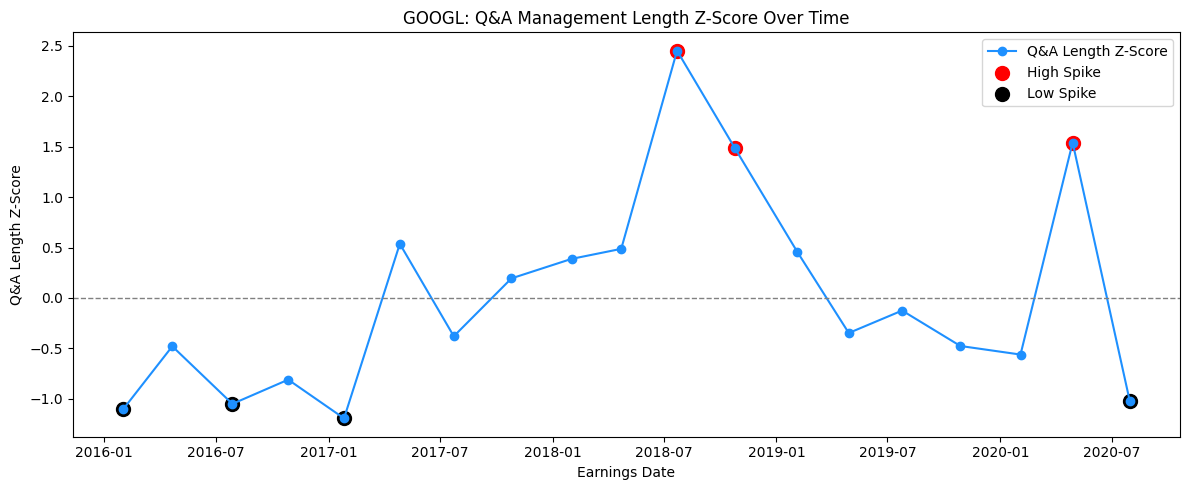

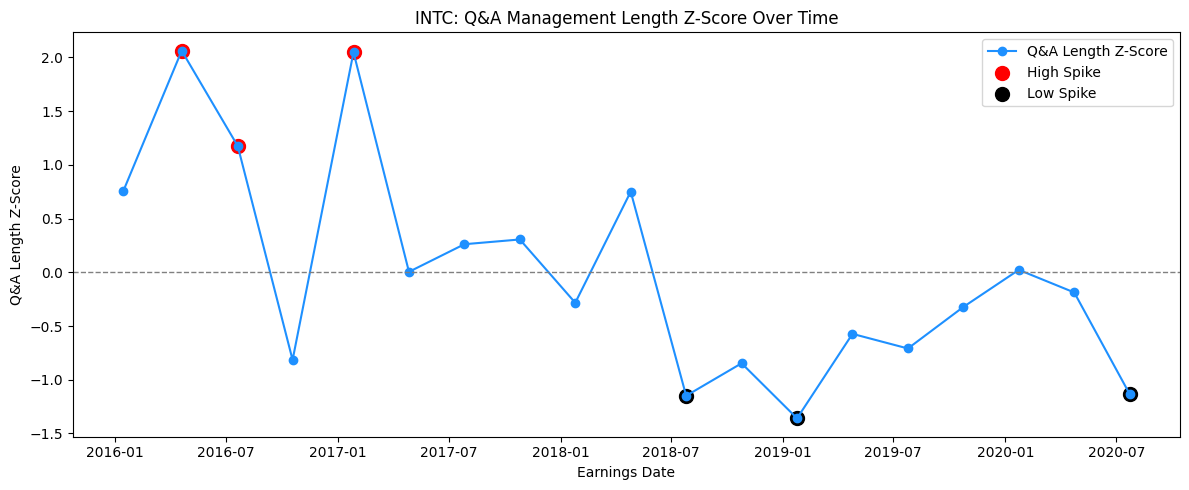

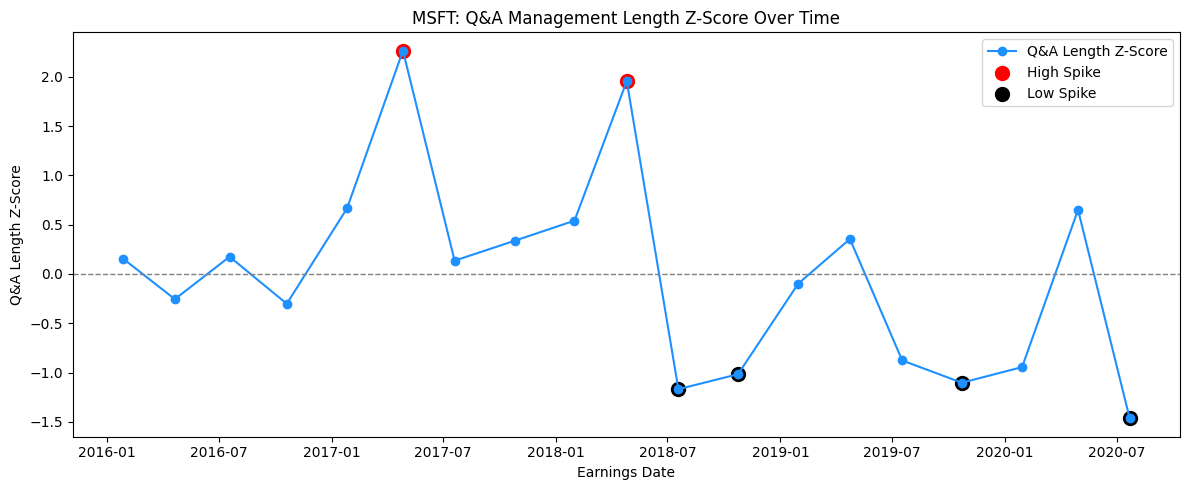

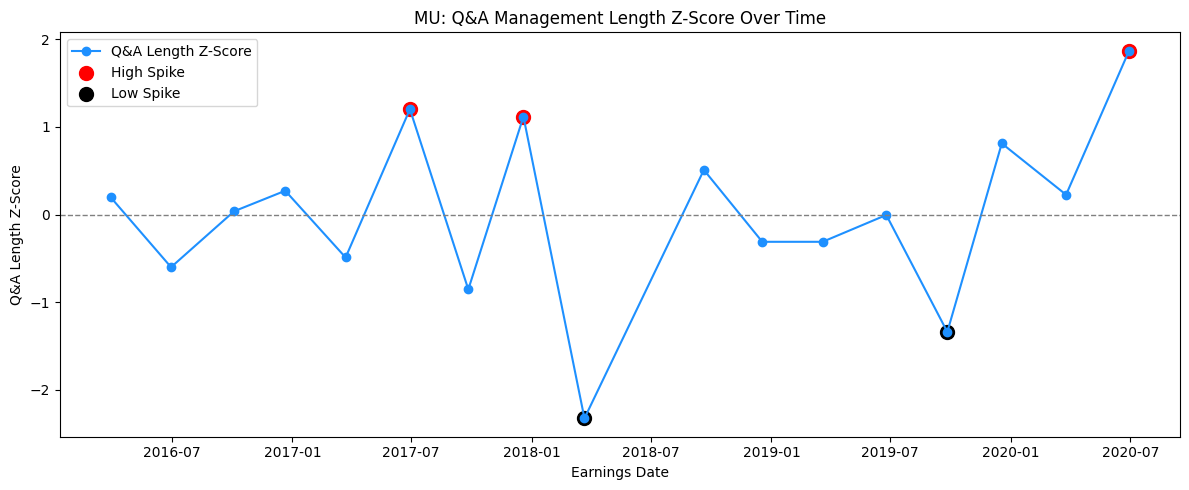

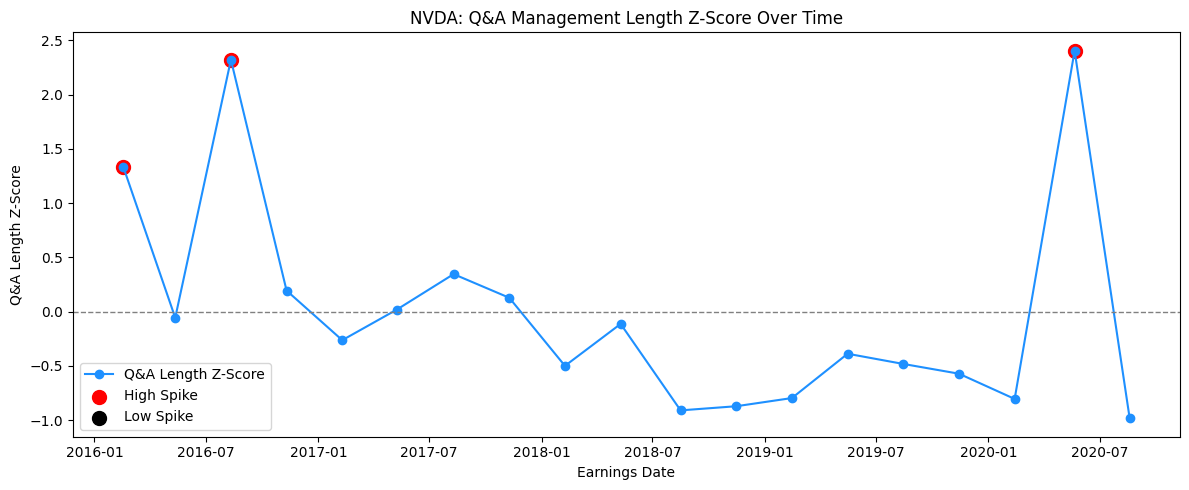

In [12]:
tickers = full_data['ticker'].unique()

for t in tickers:
    df_t = full_data[full_data['ticker'] == t].sort_values("earnings_date")

    plt.figure(figsize=(12,5))

    # Plot Q&A length z-score
    plt.plot(
        df_t["earnings_date"],
        df_t["qa_management_length_zscore"],
        marker='o',
        linestyle='-',
        color='dodgerblue',
        label="Q&A Length Z-Score"
    )

    # Highlight high and low spikes
    high_spikes = df_t["qa_management_length_zscore"] > 1.0
    low_spikes  = df_t["qa_management_length_zscore"] < -1.0

    plt.scatter(
        df_t.loc[high_spikes, "earnings_date"],
        df_t.loc[high_spikes, "qa_management_length_zscore"],
        color='red',
        s=100,
        label="High Spike"
    )

    plt.scatter(
        df_t.loc[low_spikes, "earnings_date"],
        df_t.loc[low_spikes, "qa_management_length_zscore"],
        color='black',
        s=100,
        label="Low Spike"
    )

    plt.axhline(0, color='gray', linestyle='--', linewidth=1)
    plt.xlabel("Earnings Date")
    plt.ylabel("Q&A Length Z-Score")
    plt.title(f"{t}: Q&A Management Length Z-Score Over Time")
    plt.legend()
    plt.tight_layout()
    plt.show()

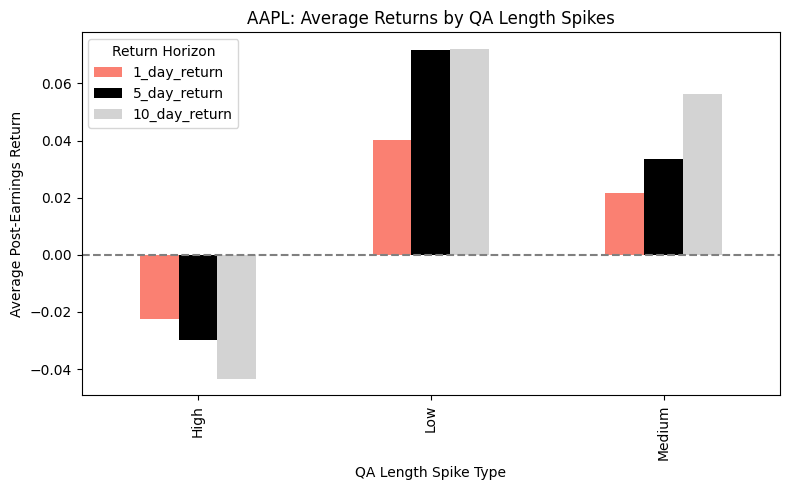

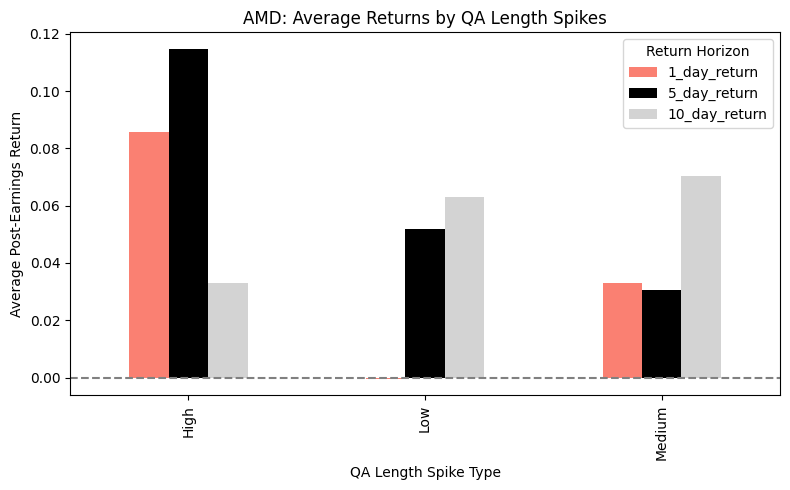

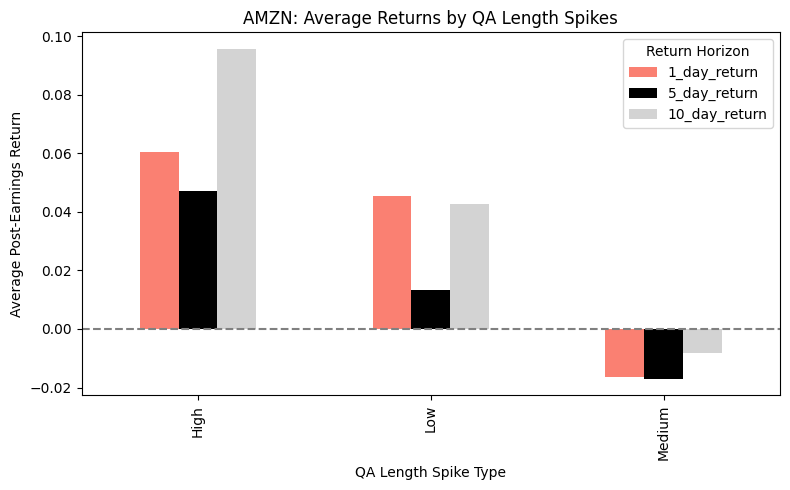

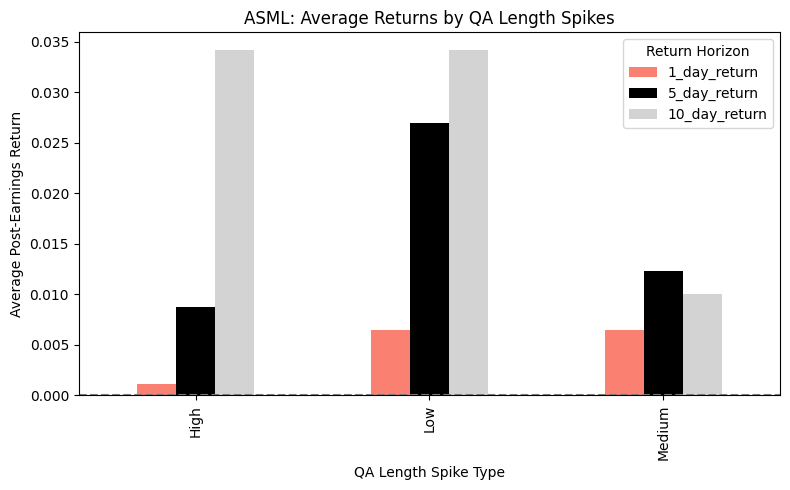

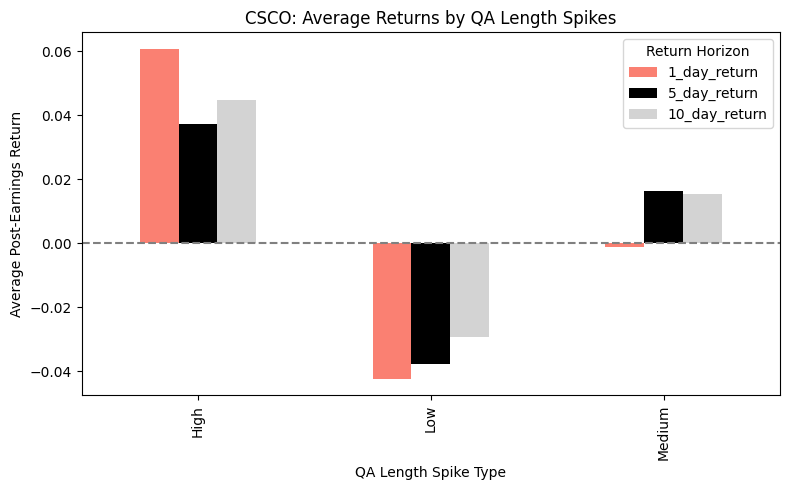

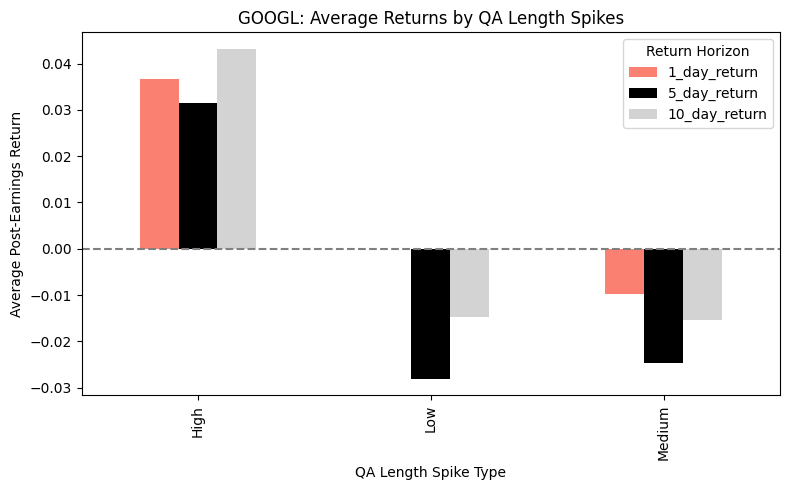

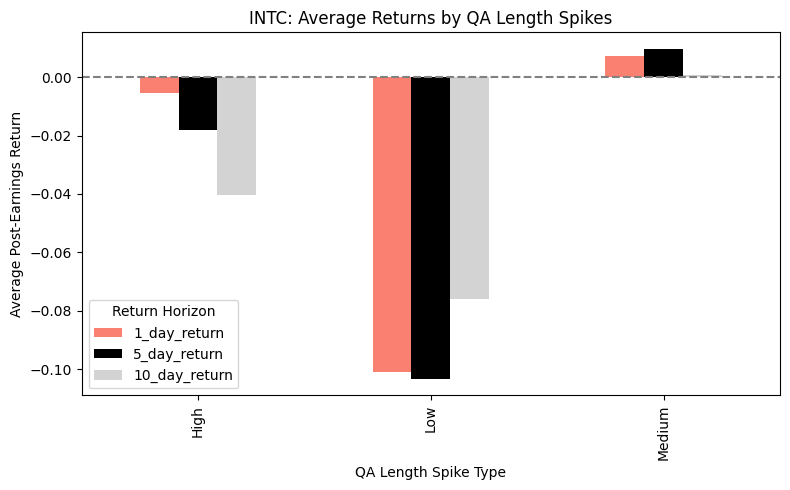

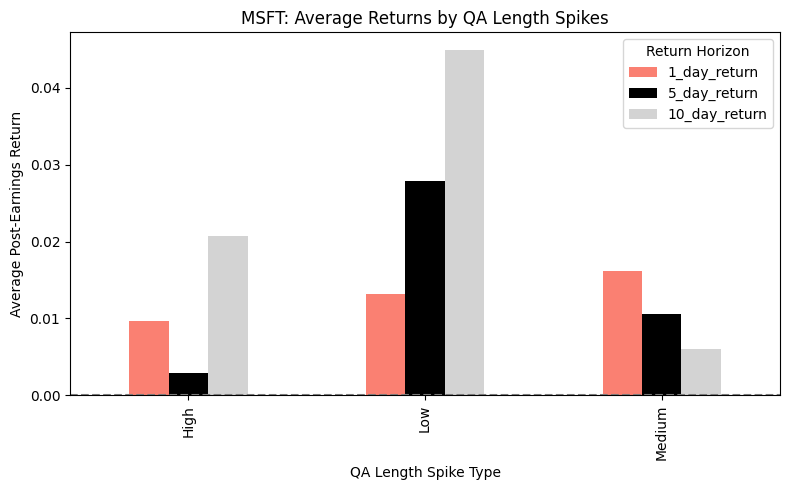

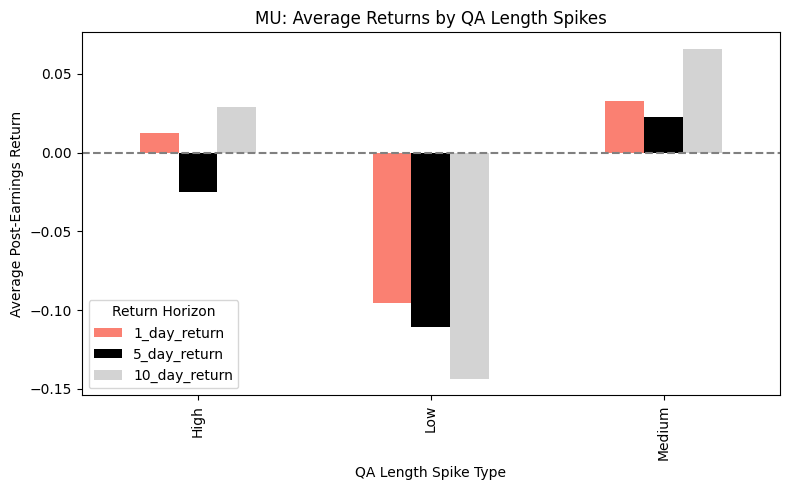

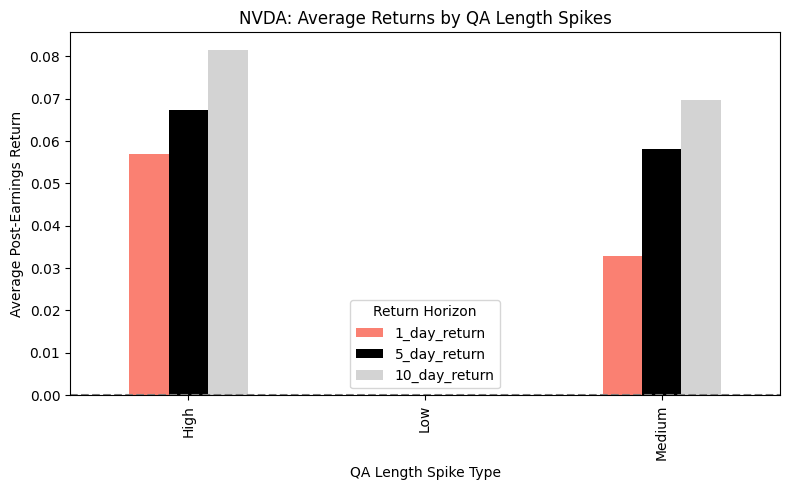

In [13]:
tickers = full_data['ticker'].unique()

for t in tickers:
    df_t = full_data[full_data['ticker'] == t].sort_values("earnings_date")

    # Define spikes
    high_spikes = df_t["qa_management_length_zscore"] > 1.0
    low_spikes  = df_t["qa_management_length_zscore"] < -1.0
    medium_spikes = df_t["qa_management_length_zscore"].between(-1.0, 1.0)

    # Compute average returns
    avg_returns = pd.DataFrame({
        "High": df_t.loc[high_spikes, ["1_day_return","5_day_return","10_day_return"]].mean(),
        "Low": df_t.loc[low_spikes, ["1_day_return","5_day_return","10_day_return"]].mean(),
        "Medium": df_t.loc[medium_spikes, ["1_day_return","5_day_return","10_day_return"]].mean()
    }).T

    # Reindex explicitly to enforce order
    avg_returns = avg_returns.reindex(["High", "Low", "Medium"])

    # Plot
    avg_returns.plot(
        kind="bar",
        figsize=(8,5),
        color=["salmon", "black", "lightgray"]
    )
    plt.ylabel("Average Post-Earnings Return")
    plt.xlabel("QA Length Spike Type")
    plt.title(f"{t}: Average Returns by QA Length Spikes")
    plt.axhline(0, linestyle="--", color="gray")
    plt.legend(title="Return Horizon")
    plt.tight_layout()
    plt.show()


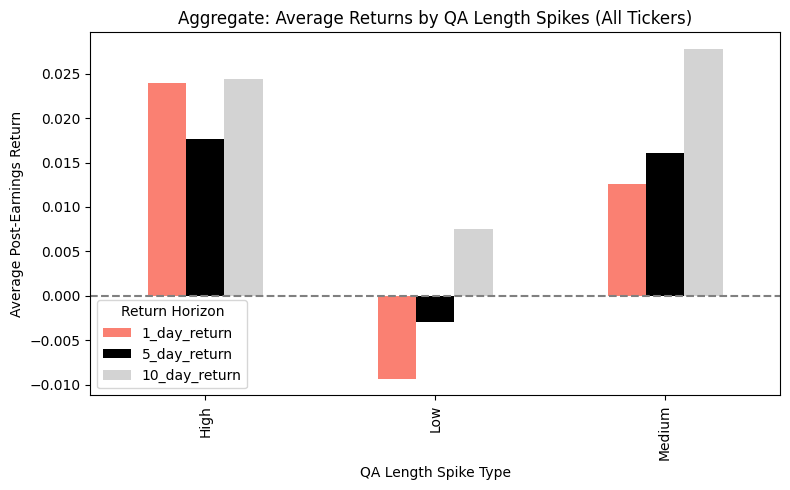

In [14]:
# Step 1: Define spikes across the full dataset
high_spikes = full_data["qa_management_length_zscore"] > 1.0
low_spikes  = full_data["qa_management_length_zscore"] < -1.0
medium_spikes = full_data["qa_management_length_zscore"].between(-1.0, 1.0)

# Step 2: Compute mean returns per spike type
avg_returns_agg = pd.DataFrame({
    "High": full_data.loc[high_spikes, ["1_day_return","5_day_return","10_day_return"]].mean(),
    "Low": full_data.loc[low_spikes, ["1_day_return","5_day_return","10_day_return"]].mean(),
    "Medium": full_data.loc[medium_spikes, ["1_day_return","5_day_return","10_day_return"]].mean()
}).T

# Step 3: Reindex to enforce order High → Low → Medium
avg_returns_agg = avg_returns_agg.reindex(["High", "Low", "Medium"])

# Step 4: Plot
colors = ["salmon", "black", "lightgray"]

avg_returns_agg.plot(
    kind="bar",
    figsize=(8,5),
    color=colors
)

plt.ylabel("Average Post-Earnings Return")
plt.xlabel("QA Length Spike Type")
plt.title("Aggregate: Average Returns by QA Length Spikes (All Tickers)")
plt.axhline(0, linestyle="--", color="gray")
plt.legend(title="Return Horizon")
plt.tight_layout()
plt.show()

Hypothesis: high uncertainty and short qna responses could signal poor post-earnings stock movement

In [15]:
X = full_data[
    [
        "qa_management_length_zscore",
        "excess_uncertainty_qa",
        "finbert_qa_management_neg"
    ]
]

# Interaction term
X["length_x_uncertainty"] = (
    X["qa_management_length_zscore"] * X["excess_uncertainty_qa"]
)

X = sm.add_constant(X)
y = full_data["5_day_return"]

model = sm.OLS(y, X).fit(cov_type="HC3")
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           5_day_return   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.976
Date:                Mon, 19 Jan 2026   Prob (F-statistic):              0.100
Time:                        05:29:07   Log-Likelihood:                 171.13
No. Observations:                 188   AIC:                            -332.3
Df Residuals:                     183   BIC:                            -316.1
Df Model:                           4                                         
Covariance Type:                  HC3                                         
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

/tmp/ipython-input-260018617.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["length_x_uncertainty"] = (


In [16]:
full_data["length_regime"] = pd.cut(
    full_data["qa_management_length_zscore"],
    bins=[-10, -1, 1, 10],
    labels=["Short", "Normal", "Long"]
)

full_data["unc_regime"] = pd.qcut(
    full_data["excess_uncertainty_qa"],
    2,
    labels=["Low Unc", "High Unc"]
)


In [17]:
pivot = full_data.pivot_table(
    values="5_day_return",
    index="length_regime",
    columns="unc_regime",
    aggfunc="mean"
)

print(pivot)


unc_regime      Low Unc  High Unc
length_regime                    
Short          0.005978 -0.008677
Normal         0.020024  0.011339
Long           0.016057  0.018789


/tmp/ipython-input-95320793.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = full_data.pivot_table(


In [18]:
# Count number of events in each regime
counts = full_data.pivot_table(
    values="5_day_return",   # any column works
    index="length_regime",
    columns="unc_regime",
    aggfunc="count"
)

print("Number of observations per regime:")
print(counts)


Number of observations per regime:
unc_regime     Low Unc  High Unc
length_regime                   
Short               12        19
Normal              71        59
Long                11        16


/tmp/ipython-input-3515620716.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  counts = full_data.pivot_table(


In [19]:
# Function to pivot average returns
def pivot_returns(col):
    return full_data.pivot_table(
        values=col,
        index="length_regime",
        columns="unc_regime",
        aggfunc="mean"
    )

avg_1d = pivot_returns("1_day_return")
avg_5d = pivot_returns("5_day_return")
avg_10d = pivot_returns("10_day_return")

print("Average 1-day returns:\n", avg_1d)
print("\nAverage 5-day returns:\n", avg_5d)
print("\nAverage 10-day returns:\n", avg_10d)


Average 1-day returns:
 unc_regime      Low Unc  High Unc
length_regime                    
Short         -0.000541 -0.014903
Normal         0.017320  0.006859
Long           0.011667  0.032488

Average 5-day returns:
 unc_regime      Low Unc  High Unc
length_regime                    
Short          0.005978 -0.008677
Normal         0.020024  0.011339
Long           0.016057  0.018789

Average 10-day returns:
 unc_regime      Low Unc  High Unc
length_regime                    
Short          0.006571  0.008037
Normal         0.037814  0.015782
Long           0.008511  0.035263


/tmp/ipython-input-1288694661.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  return full_data.pivot_table(
/tmp/ipython-input-1288694661.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  return full_data.pivot_table(
/tmp/ipython-input-1288694661.py:3: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  return full_data.pivot_table(


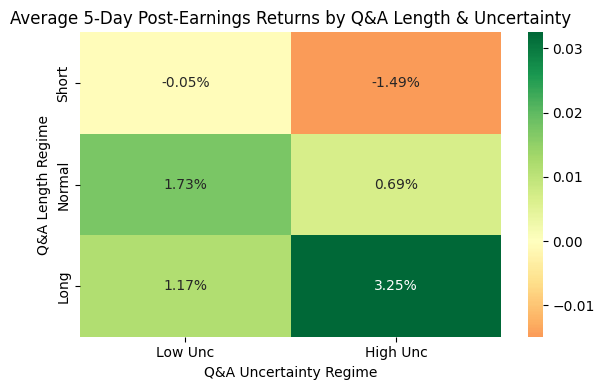

In [25]:
plt.figure(figsize=(6,4))
sns.heatmap(
    avg_1d,
    annot=True,
    fmt=".2%",
    cmap="RdYlGn",
    center=0
)

plt.title("Average 5-Day Post-Earnings Returns by Q&A Length & Uncertainty")
plt.ylabel("Q&A Length Regime")
plt.xlabel("Q&A Uncertainty Regime")
plt.tight_layout()
plt.show()

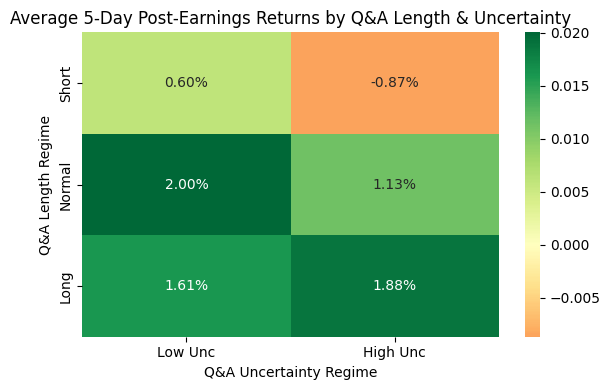

In [26]:
plt.figure(figsize=(6,4))
sns.heatmap(
    avg_5d,
    annot=True,
    fmt=".2%",
    cmap="RdYlGn",
    center=0
)

plt.title("Average 5-Day Post-Earnings Returns by Q&A Length & Uncertainty")
plt.ylabel("Q&A Length Regime")
plt.xlabel("Q&A Uncertainty Regime")
plt.tight_layout()
plt.show()
